In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'force'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：作用力因子（force）,f=ma    
因子定义： t时刻的价格速度变化 * 价格p 
$$
PriceSpeed_t = \frac{Price_t - Price_{t-1}}{Price_{t-1}}   
$$
$$
PriceSpeedChange_t = PriceSpeed_t - PriceSpeed_{t-1}
$$
$$
factor = PriceSpeedChange_t * Price_t
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : force
fields : ['close']
other_dIepend_factors : ['price_speed_change']
calc_params : {'v_period': 1, 'a_period': 1}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-20284.486, 18297.31]
process_suggest_method : standardization


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

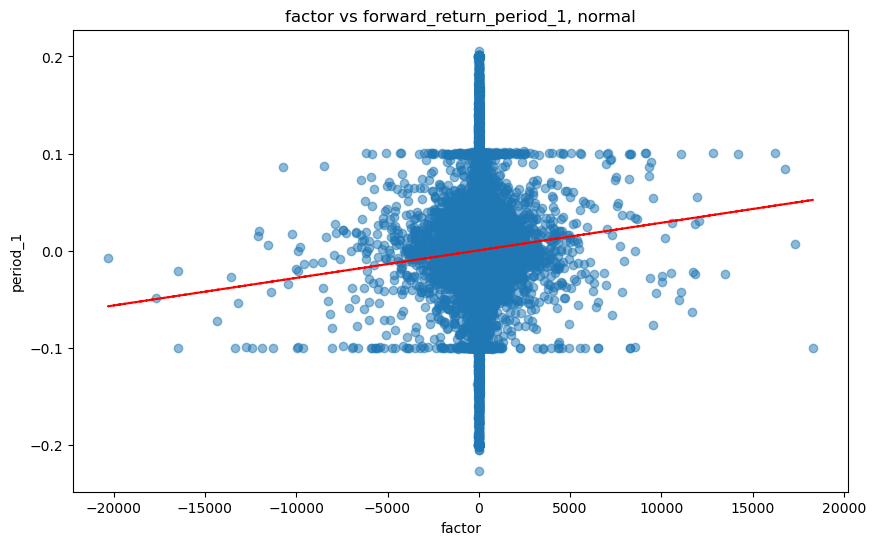

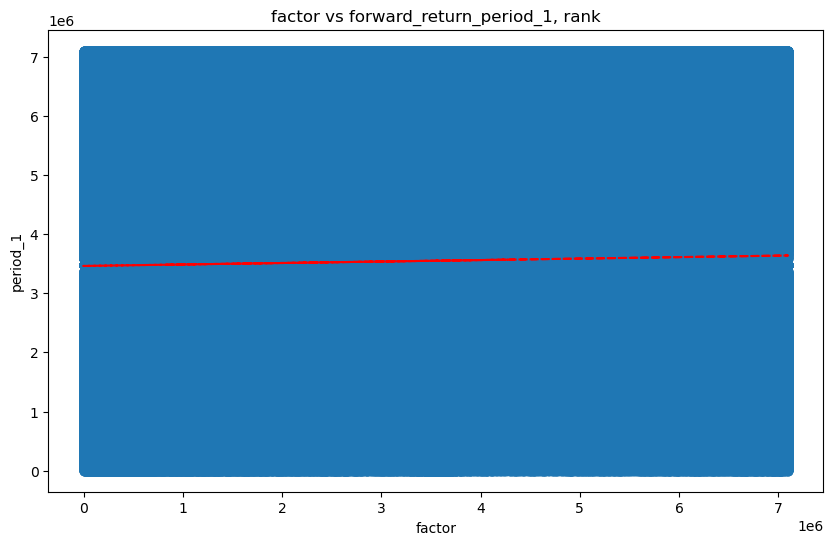

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

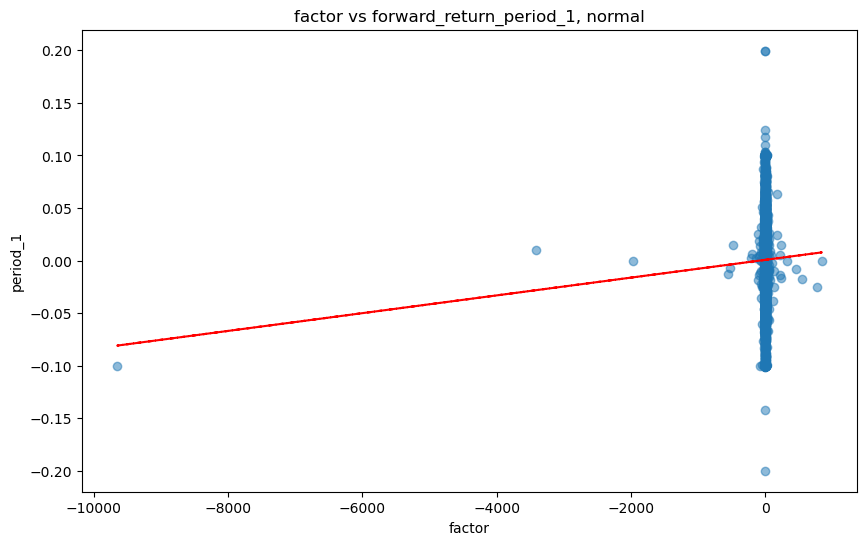

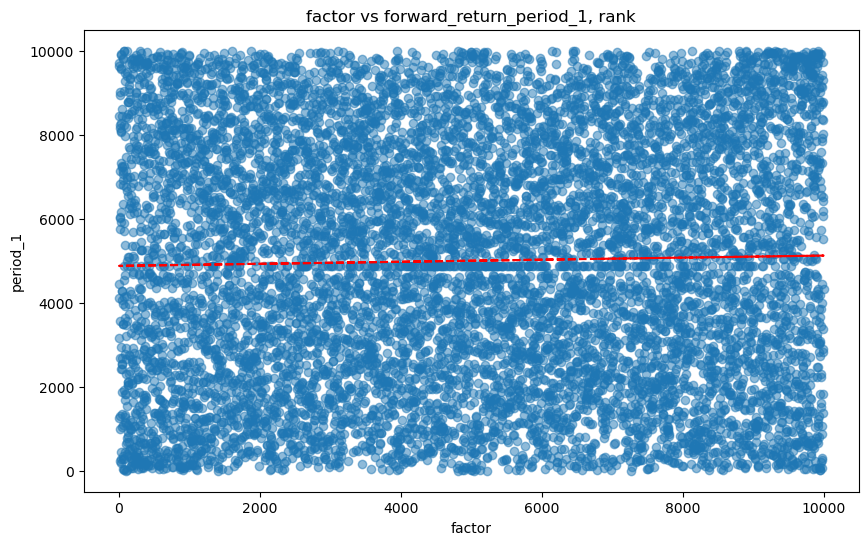

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

In [1]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.005,0.995))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-15,15))

NameError: name 'zy_fa' is not defined

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
               period_1  period_2  period_3  period_5  period_8 period_13  \
norm_ic_mean  0.002737  0.001128  0.001062  0.001034  0.000706  0.000604   
norm_ic_std   0.026073  0.025162  0.024681  0.024476   0.02367  0.023388   
norm_ir       0.104972  0.044842  0.043049  0.042253  0.029814  0.025821   
norm_abs_ic   0.005973  0.003225  0.002195  0.002152  0.001732  0.001519   
rank_ic_mean  0.011011 -0.001523 -0.001749 -0.003629 -0.005597 -0.003534   
rank_ic_std   0.103749   0.09889  0.097852  0.095041  0.088456  0.086661   
rank_ir       0.106129 -0.015405 -0.017876 -0.038181 -0.063271 -0.040777   
rank_abs_ic   0.024854   0.00593  0.012183  0.009849  0.001992  0.005396   

             period_21 period_34 period_55 period_89 period_144 period_233  \
norm_ic_mean  0.000385   0.00026  0.000212  0.000215   0.000281   0.000197   
norm_ic_std   0.022859  0.022726   0.02266  0.022053   0.022762   0.022078   
norm_ir       0.016833  0.011462  0.009335  0.009758   0.012324 

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

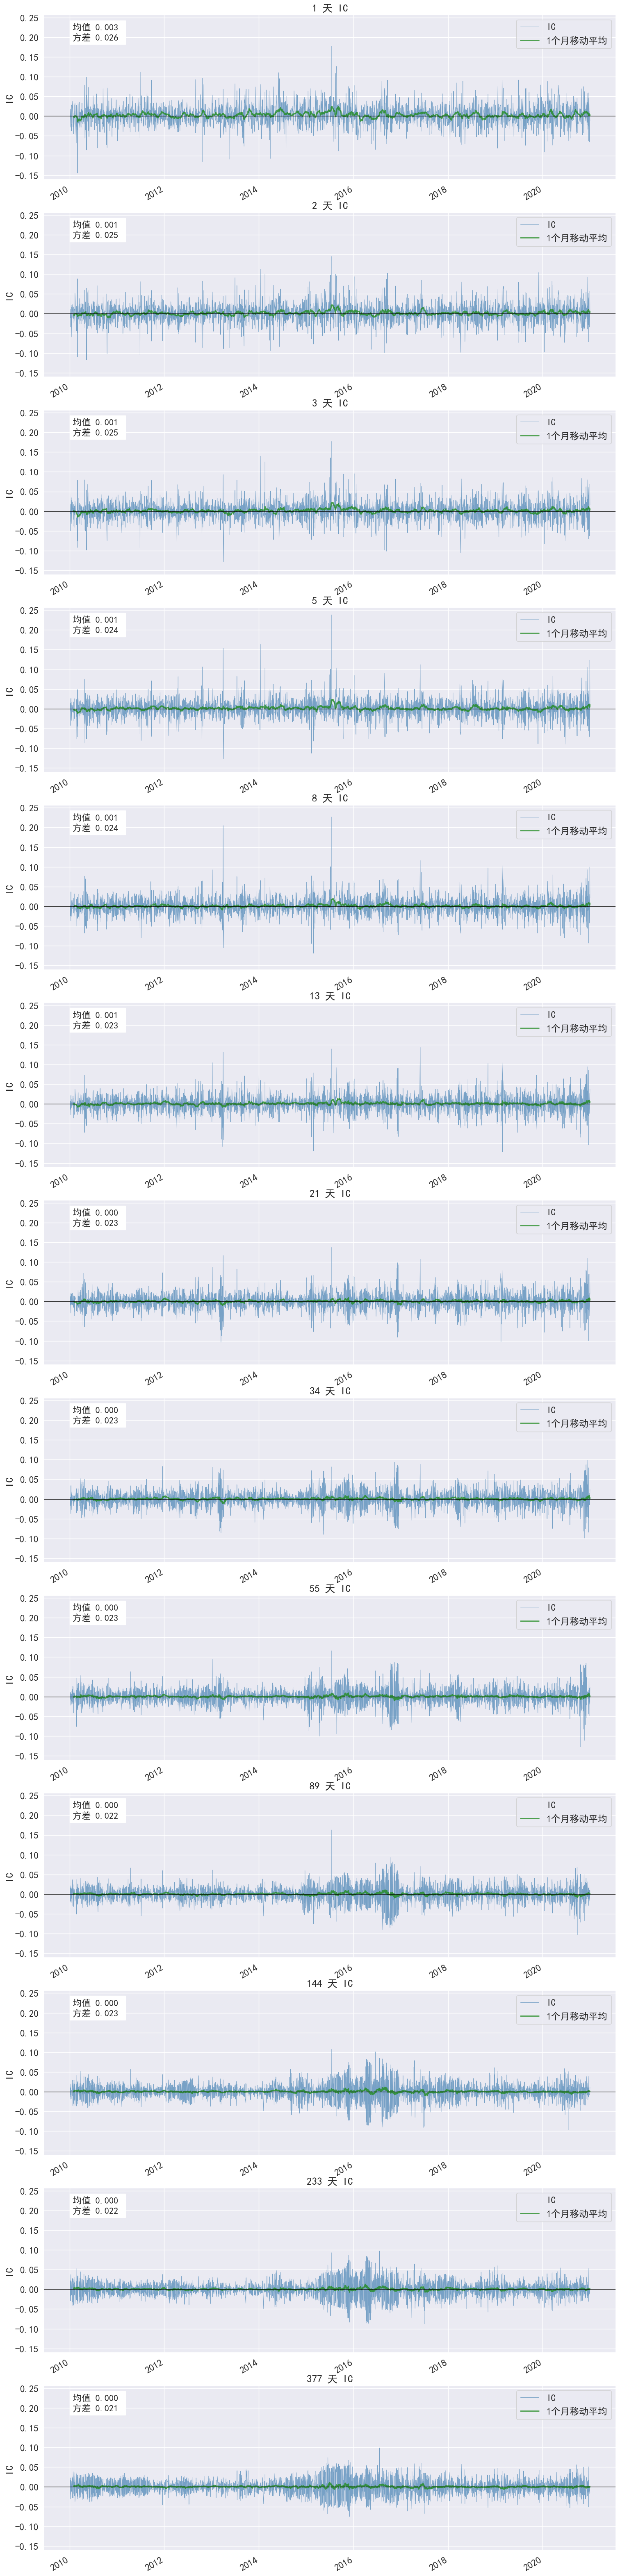

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

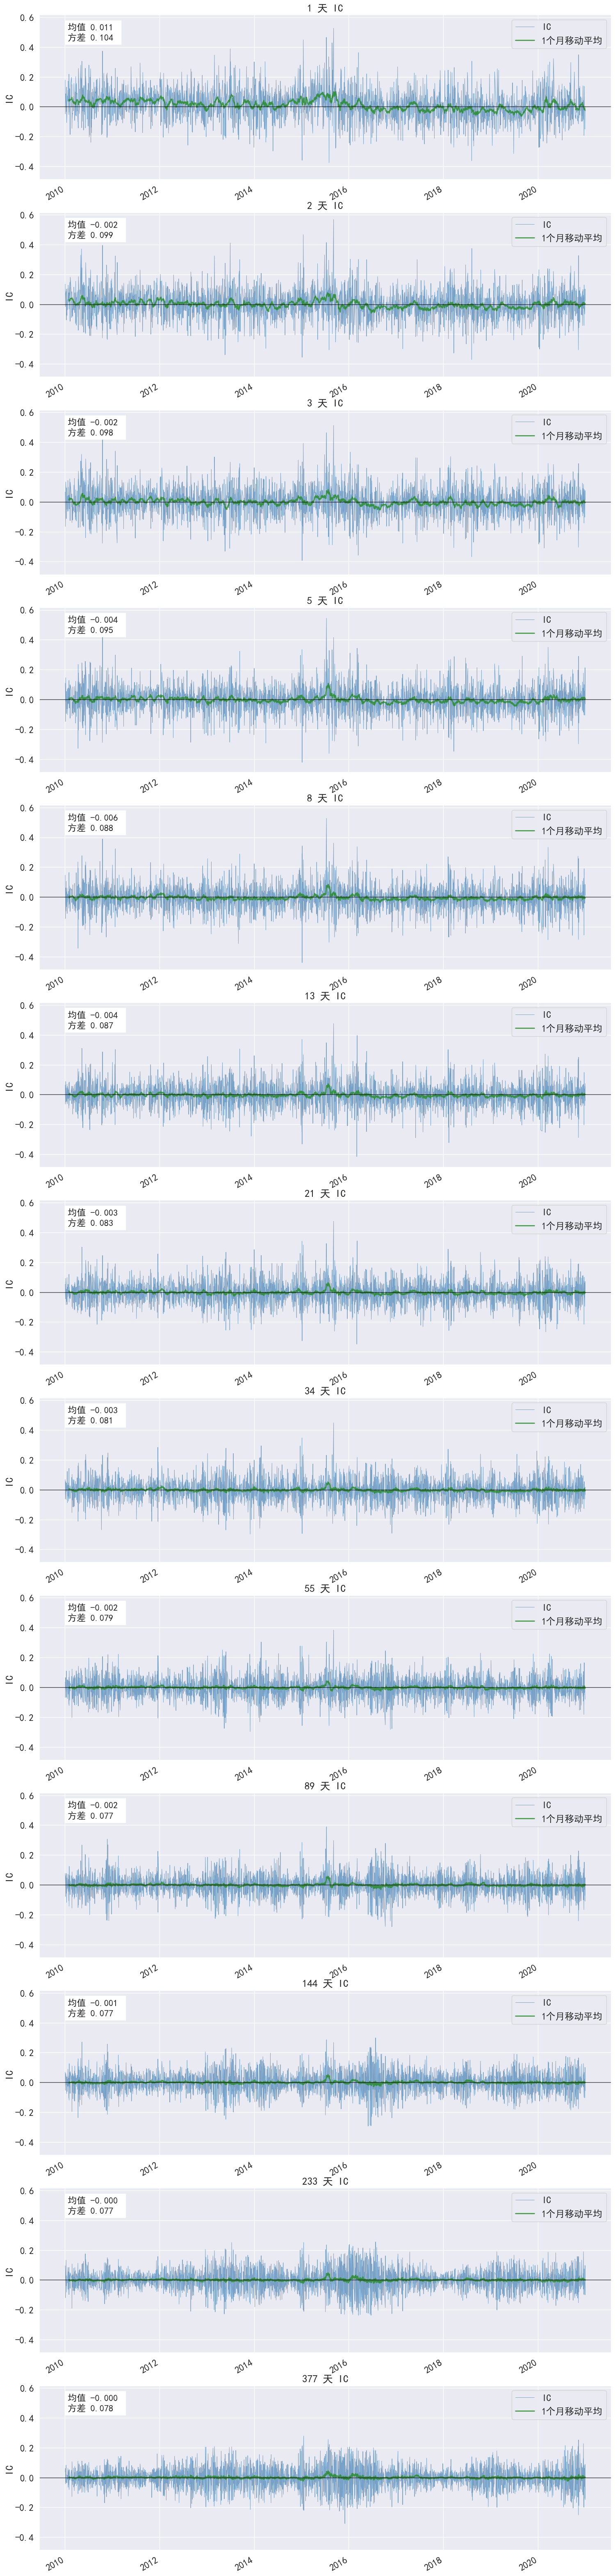

In [13]:
zy_fa.plot_rank_ic_ts()